# The Tips Data Set

### Fundamentals of Data Analysis Assessment

***
## 1. Introduction
This notebook begins with a description of the tips data set obtained using summary statistics. There follows a section on regression to investigate if there is a relationship between the total bill and the tip amount. Finally, any interesting relationships between variables within the data set are teased out and investigated further. Findings from each part of the analysis are summarized in the README file.

### Preliminaries
Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as lm
from scipy import stats

***
## 2. Description of the data set

**Load the data set to a dataframe and take a quick look at it by printing the first and last five lines.**

In [2]:
# Load the data set.
tips = sns.load_dataset("tips")

# Size?
shape = tips.shape
print("Data frame shape", shape, "r,c")

# Print the first/last five lines.
tips.head()

Data frame shape (244, 7) r,c


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The rows of the data set contain **244** observations of the total bill and tip left in a resaurant, along with information about party size, day of the week, time of day, gender of the tipper, and whether or not they are a smoker. Three columns contain numeric data with class labels *total_bill*, *tip*, and *size*. The remaining four columns contain categorical data (divided into discrete groups) with class labels *sex*, *smoker*, *day*, and *time*. 

In [4]:
# Check for NaNs etc
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

Looks like there are no funny values in the data set so we can proceed without dealing with NaN values and other cleaning.

In [5]:
# Look at some quick descriptive statistics of the numeric data.
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


**Calculate tip as a fraction of total_bill**

Although this is useful, when we think of tips we usually imagine a percentage of the bill. I would say that the most important information contained in the data set is the tip as a fraction of the total bill. For this I will assume that the total_bill is the bill before the tip has been added in. 

In [6]:
# Make an empty data frame to hold tip as fraction of total bill.
ftip = pd.DataFrame(columns=['ftip'])
ftip['ftip'] = tips['tip']/tips['total_bill']

# Attach it to tips dataframe I think so can use groupby etc, work with df from now on.
df = pd.concat([ftip, tips], axis=1)

df.head( )

,ftip,total_bill,tip,sex,smoker,day,time,size
0,0.059447,16.99,1.01,Female,No,Sun,Dinner,2
1,0.160542,10.34,1.66,Male,No,Sun,Dinner,3
2,0.166587,21.01,3.50,Male,No,Sun,Dinner,3
3,0.139780,23.68,3.31,Male,No,Sun,Dinner,2
4,0.146808,24.59,3.61,Female,No,Sun,Dinner,4


**Pandas describe()**

In [7]:
# Get descriptive statistics for all columns, not just the numeric ones.
df.describe(include="all")

,ftip,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,157,151,87,176,NaN
mean,0.160803,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,0.061072,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,0.035638,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,0.129127,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,0.154770,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,0.191475,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- It looks as if the average tip is about 16% of the total bill, although some very generous diner tipped 70% and a stingy one left only 3%.
- The 50th percentile, or median, fractional tip is very similar to the mean fractional tip. This implies that the mean value is a typical value in the data set. 
- There are two unique values of sex, which we know to be Male and Female. Of the 244 observations, 157 concern males.
- There are two unique values of smoker, which we know to be Yes or No. Of the 244 observations, 151 concern smokers.
- Four unique values of day, Saturday being the most frequent with 87 of the 244 observations.
- Two unique values of time, with most meals being dinner: 176 of the total.
- Party size varied from 1 to 6.

**Plot preferences**

In [8]:
## To pick color palette
# sns.choose_colorbrewer_palette(data_type="q")

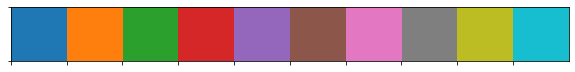

In [9]:
# Set up my plotting preferences.
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set_style('whitegrid')

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (10, 6)
# Set font size for axes labels etc.
plt.rcParams['font.size'] = (14)

**We now start plotting some columns of the data set.**

Text(0.5, 0.98, 'tip vs total bill')

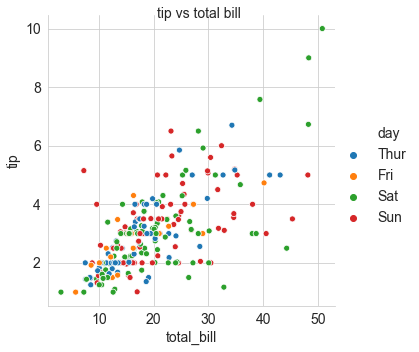

In [10]:
# How does tip vary with total_bill?
g = sns.relplot(x="total_bill", y="tip", hue='day', data=df) #size='time' makes the plot crowded.
g.fig.suptitle('tip vs total bill', fontsize=14)

# Save the plot if required.
#g.savefig("images/tipVSbill.png") # Comment out after figure saved.

In this plot each color refers to a different day. It appears that the tip does increase as the total_bill goes up. We'll be looking at this in more detail in the section on regression. For now, we'll plot the tip as a fraction of the total bill. This should be roughly a constant with some spread reflecting the range of straight lines that could be drawn through the data in the plot above.

Text(0, 0.5, 'fractional tip')

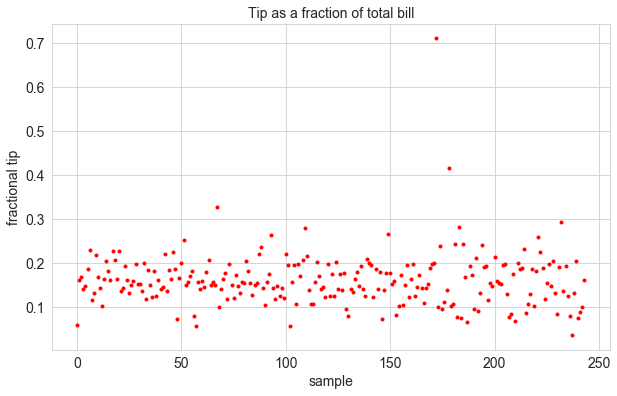

In [11]:
# Tip as a fraction of the total_bill.
plt.plot(df['ftip'], '.r')
plt.title('Tip as a fraction of total bill', fontsize='14')
plt.xlabel('sample', fontsize='14')
plt.ylabel('fractional tip', fontsize='14')

**Identify max (outlier) and min fractional tip**

There seems to be one outlier - the 70% tip. It might be better to ignore it, we'll see later. For now just find it's location and who it refers to.

In [12]:
# Identify the outlier.
df.iloc[df.index[df['ftip'] > 0.5]]

,ftip,total_bill,tip,sex,smoker,day,time,size
172,0.710345,7.25,5.15,Male,Yes,Sun,Dinner,2


In [13]:
# Identify the lowest tip
# df.min(axis=0)['ftip']
df.iloc[df.index[df['ftip'] == df.min(axis=0)['ftip'] ]]

,ftip,total_bill,tip,sex,smoker,day,time,size
237,0.035638,32.83,1.17,Male,Yes,Sat,Dinner,2


In [14]:
# What are the days and dining times contained in the data set?
print("Dining times are: ", df.time.unique())
print("Days are: ", df.day.unique())

Dining times are:  [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]
Days are:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


### Dig deeper into the data set.
I will now look at how some of the other variables affect tip size. Although Seaborn allows for some very complicated visualizations, I prefer not to put too much information on one plot at this stage.

Text(0.5, 1.0, 'Distribution of tip as a fraction of bill')

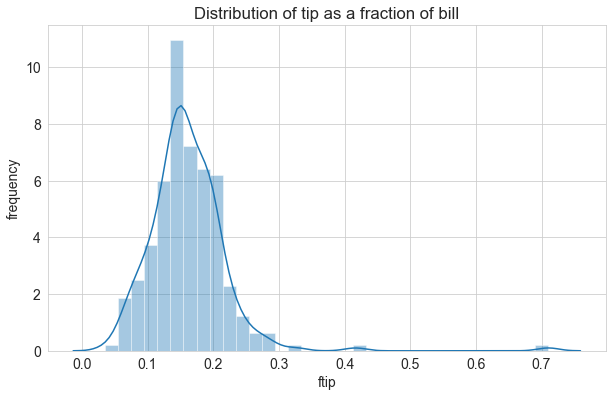

In [15]:
# Histogram of all fractional tips.
ax = sns.distplot(df['ftip'])
ax.set(xlabel= 'ftip', ylabel= 'frequency')
plt.title("Distribution of tip as a fraction of bill")

That outlier at 0.7 is going to mess up my plots if I leave it in place. I'm tempted to ignore it/replace it with something. I don't think it will affect calculations of mean etc too much though, it just doesn't look nice.

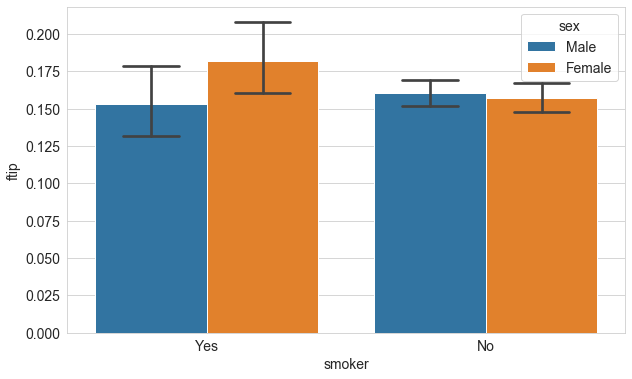

In [16]:
# Plot the fractional tip for smokers/non-smokers and male/female.
# Ignoring outlier doesn't have much effect. I checked that with commented code.
sns.barplot(x= 'smoker', y= 'ftip', hue='sex', data = df, capsize=.2) #data = df[df.ftip < 0.6]
# Save the plot if required.
#plt.savefig("images/barSmokerSex.png")

This Seaborn barplot shows the mean fractional tip for male/female smokers/non-smokers. The error bars mark the 95% confidence interval: range within which there is a 95% chance of finding the mean. Looks like male and female non-smokers leave very similar fractional tips. However, female smokers leave larger tips on average, as a fraction of the total bill, than male smokers.

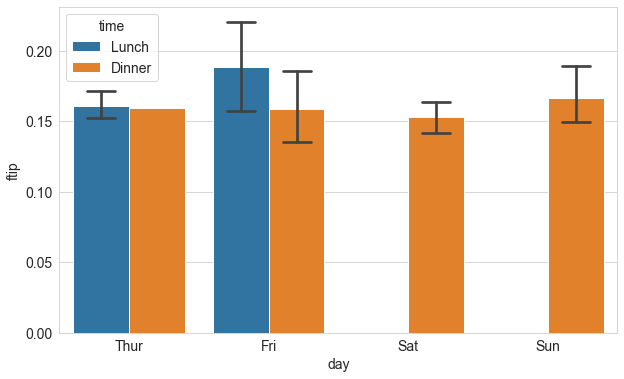

In [17]:
# How does the time affect the fractional tip?
sns.barplot(x="day", y="ftip", hue="time", data=df, capsize=.2) #data=df[df.ftip < 0.6] to ignore outlier
# Save the plot if required.
#plt.savefig("images/barDayTime.png")

From the above plot we see that while data from only dinner is recorded on Saturday and Sunday, both lunch and dinner are recorded on Fridays, and there seems to be only one observation relating to dinner on Thursday. On average, the largest fractional tips are left on Fridays at lunchtime - maybe happy end of week work lunches? We will look at how the variables are intertwined later on in the notebook.

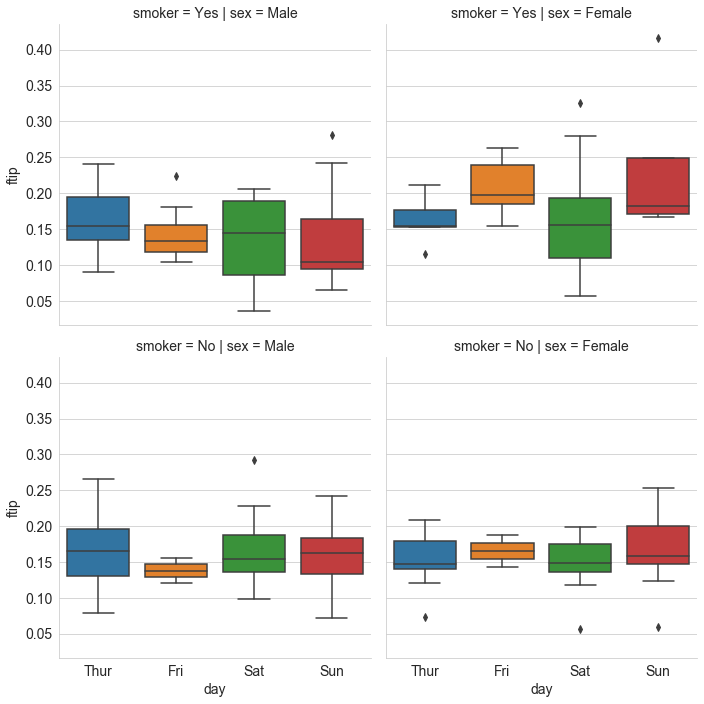

In [18]:
# Try to combine the categorical variables using catplot to make a grid of plots.
# Ignore outlier.
sns.catplot(x='day', y='ftip', row='smoker', col='sex', kind='box', data = df[df.ftip < 0.6])

This faceted box plot attempts to show the fractional tip as a function of day, with the data arranged by categorical variables smoker and sex. Note how all the y axis ranges are identical for ease of comparison. Each box shows the quartiles of the data set, the whiskers show the range, and outliers appear as points. Quartiles divide the data into quarters; the first quartile is the middle of the smallest number and the median, the second quartile is the median value, and the third quarter is the middle of the median and the largest number in the data set. This plot again confirms that non-smokers, regardless of whether they are male or female, leave similar tips (bottom two plots above). There's a bit more variation for tips left by males and females when they are smokers (top two plots).  

**Use Pandas groupby() to analyze the data**

Confirm this difference in tipping behavior between male and female smokers by using Pandas **agg()** to look at mean values of numeric columns for those two categorical variables. Count the number of observations in each category at the same time; the total of each column should equal 244.

In [19]:
df.groupby(['smoker', 'sex']).agg(['count','mean'])

ftip           total_bill              tip            size  \
              count      mean      count       mean count      mean count   
smoker sex                                                                  
Yes    Male      60  0.152771         60  22.284500    60  3.051167    60   
       Female    33  0.182150         33  17.977879    33  2.931515    33   
No     Male      97  0.160669         97  19.791237    97  3.113402    97   
       Female    54  0.156921         54  18.105185    54  2.773519    54   

                         
                   mean  
smoker sex               
Yes    Male    2.500000  
       Female  2.242424  
No     Male    2.711340  
       Female  2.592593

For this combination of categorical variables the largest average fractional tip appears in the female smoker cell. Do the same thing for day and time categorical variables; largest mean fractional tip is left at lunchtime on Friday.

In [20]:
df.groupby(['day', 'time']).agg(['count','mean'])

ftip           total_bill              tip            size  \
            count      mean      count       mean count      mean count   
day  time                                                                 
Thur Lunch     61  0.161301         61  17.664754    61  2.767705    61   
     Dinner     1  0.159744          1  18.780000     1  3.000000     1   
Fri  Lunch      7  0.188765          7  12.845714     7  2.382857     7   
     Dinner    12  0.158916         12  19.663333    12  2.940000    12   
Sat  Dinner    87  0.153152         87  20.441379    87  2.993103    87   
Sun  Dinner    76  0.166897         76  21.410000    76  3.255132    76   

                       
                 mean  
day  time              
Thur Lunch   2.459016  
     Dinner  2.000000  
Fri  Lunch   2.000000  
     Dinner  2.166667  
Sat  Dinner  2.517241  
Sun  Dinner  2.842105

How does the size of the dining party affect the tip left?

In [21]:
df.groupby(['size']).agg(['count', 'mean'])

ftip           total_bill              tip          
     count      mean      count       mean count      mean
size                                                      
1        4  0.217292          4   7.242500     4  1.437500
2      156  0.165719        156  16.448013   156  2.582308
3       38  0.152157         38  23.277632    38  3.393158
4       37  0.145949         37  28.613514    37  4.135405
5        5  0.141495          5  30.068000     5  4.028000
6        4  0.156229          4  34.830000     4  5.225000

Looks like the best average fractional tip is left for dining parties of one. That's a bit misleading as they account for only 4 out of 244 observations. We can see this on a scatterplot. It looks like there are only a few people dining alone or in groups of 5 or 6. Most party sizes are 2 (156 of 244), with party sizes 3 and 4 also significant at around 15% of the total each. Maybe only look at a single party size? Other ways of grouping data? For last part of assessment perhaps.

Text(0.5, 1.0, 'Tip as a fraction of bill vs party size')

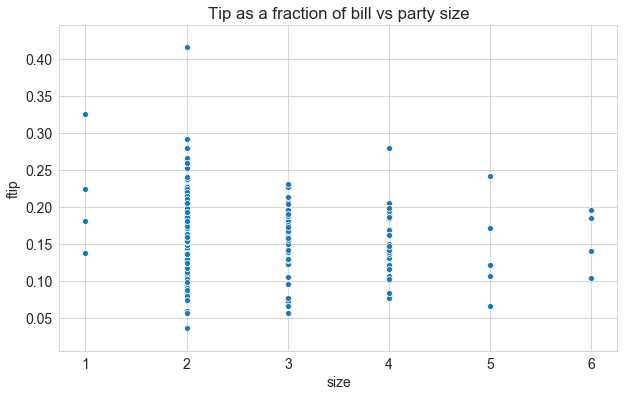

In [22]:
sns.scatterplot(x='size', y='ftip', data = df[df.ftip < 0.6]) # hue='smoker'
plt.title("Tip as a fraction of bill vs party size")

***
## 3. Regression

### 3.1 Linear regression using Seaborn

Now we will check to see if there is a relationship between the total bill and tip amount? We'll begin by using Seaborn to graphically look at all rows in the data set and check for a linear relationship on a plot of tip versus total_bill. Seaborn regplot draws a scatterplot of the two variables of interest, then fits a straight line to the data and plots the resulting regression line and a 95% confidence interval for that regression. It is a visual tool only, it does not return any parameters such as the slope and intercept of the fit, or the $R^2$ value.

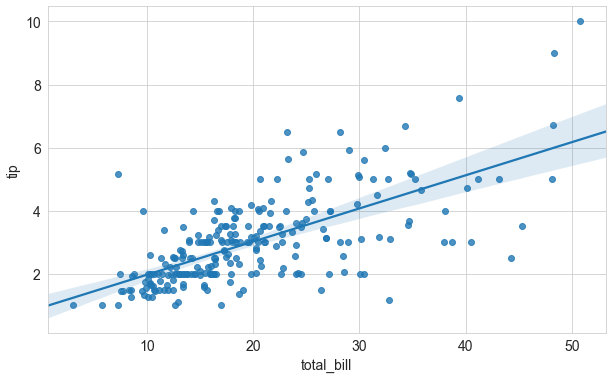

In [23]:
# Examine all rows first.
sns.regplot(x="total_bill", y="tip", data=df)

The shaded region in Seaborn regplot represents a 95% confidence interval for the regression. I would say this isn't a great fit, although there appears to be a linear relationship there. I wonder if subsets of the data might give *prettier* looking fits? For example, we can differentiate between smokers and non-smokers in the regplot.

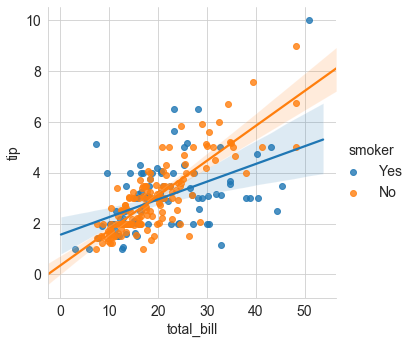

In [24]:
# Now differentiate between smokers and non-smokers.
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

The slopes of these lines are clearly different (although we can't access their values). Confidence intervals don't even overlap here. I wonder if the $R^2$ values are very different, signifying a better linear fit for smokers/non-smokers? One to explore later?

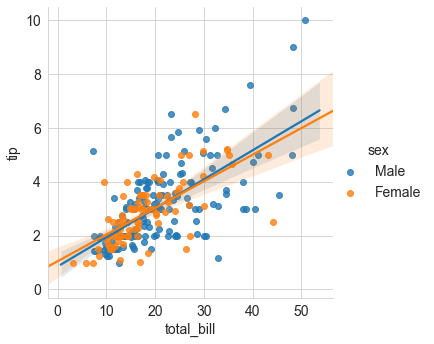

In [25]:
# Now differentiate between Male and Female.
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

Very good overlap between confidence intervals and the best fit lines here, so probably not worth considering gender alone as an interesting factor? We could continue to look at various factors below. It's difficult to tell what's going on when we set hue = day or size, but hue = time produces a similar plot to hue = sex.

In [26]:
# Try other hues. Comment out as clutter.
# sns.lmplot(x="total_bill", y="tip", hue="time", data=tips)

### 3.2 Simple linear regression
After listening to the week 9 lectures for this module on simple linear regression, I now include, for the sake of completeness, a simple linear regression model. This section was actually completed after the work in 3.3 and 3.4 below. 

Polyfit: m = 0.105025, c = 0.920270.


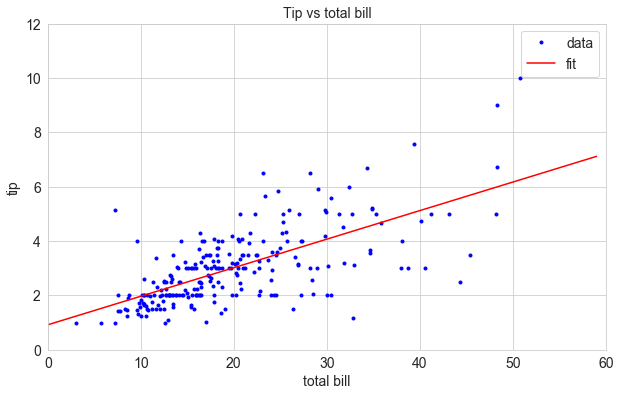

In [27]:
# Use numpy.polyfit(x, y, deg of the fit (1 is linear))
# x is the tip column of the data set.
# y is the total_bill column of the data set.

# Do simple linear regression
slr = np.polyfit(df['total_bill'], df['tip'], 1)
fit_m, fit_c = slr[0], slr[1]
print("Polyfit: m = %8.6f, c = %6.6f." % (fit_m, fit_c))

# Plot data and fitted line.
plt.plot(df['total_bill'], df['tip'], '.b', label='data')

# Plot fitted line.
x = np.arange(0.0, 60.0, 1.0)
plt.plot(x, fit_m * x + fit_c, 'r-', label="fit")

plt.title('Tip vs total bill', fontsize='14')
plt.xlabel('total bill', fontsize='14')
plt.ylabel('tip', fontsize='14')
plt.xlim(0, 60)
plt.ylim(0, 12)
plt.legend()

# Save the plot if required.
# plt.savefig("images/LSQalldata.png")

How do we check how good this fit is? As per the lecture on this topic, each fit has a cost. We want to identify the fitting parameters which minimize that cost. The numpy.polyfit function above does that automatically for us. If we want to get a metric telling us how good the fit is for these fitting parameters, we can use numpy.corrcoef to calculate the correlation matrix for the two variables (tip, total_bill); or, how strong is the linear relationship between the two variables? The result is a 2x2 matrix (because we have 2 variables), and the off-diagonal elements can be used to calculate the $R^2$ value. 

In [28]:
# Calculate the correlation matrix.
print(np.corrcoef(df['total_bill'], df['tip']))

# Square off-diagonal element to get Rsquared. [row=0][col=1]
print("R squared for this fit is:", round(np.corrcoef(df['total_bill'], df['tip'])[0][1] ** 2, 3))

[[1.         0.67573411]
 [0.67573411 1.        ]]
R squared for this fit is: 0.457


Note that the off-diagonal elements of this matrix (Pearson correlation coefficients) are positive, which means that as the value of one variable increases, so does the value of the other. If those correlation coefficients are exactly $\pm 1$, the relationship is perfectly linear. The caveat here is that variables are assumed to be normally distributed - I would say that's not a bad assumption form the histogram plotted earlier in the notebook. 

### 3.3 Regression using Statsmodels

We continue investigating if the tip amount is proportional to the total bill. We will try some ordinary least squares (OLS) fitting using the statsmodels package. The regression model we will use is OLS(y,X) and we will add a y intercept to the X data. We want to check if **tip = m total_bill + c**, where m is the slope, c is the y intercept. We do not consider any of the categorical variables at this stage.

In [29]:
# x values = total_bill and we allow for a y intecept.
c_sm = sm.add_constant(df['total_bill'].values) # used .values to get rid of a warning.
# OLS model y values = tip, x values as above.
model_sm = sm.OLS(df['tip'], c_sm)
# preform the fit
fit_sm = model_sm.fit()

print(fit_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        18:20:25   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

This summary produces a lot of information, most of which we are not interested in. Notice that the $R^2$ value is not great as a value of 1 would imply a perfect fit. It is identical to the value found above with numpy.corrcoef. We are really only interested in certain parameters:

In [30]:
print("Parameters:")
print(fit_sm.params)
print("R squared: ", fit_sm.rsquared)

Parameters:
const    0.920270
x1       0.105025
dtype: float64
R squared:  0.45661658635167646


### 3.4 Regression using scikit-learn

Repeat the fitting process using scikit-learn. LinearRegression() fits a linear model to the data.

In [31]:
# OLS model.
model = lm.LinearRegression()
# set up X values.
X = df[['total_bill']]
# set up y values.
y = df['tip']
# perform the regression.
model.fit(X, y)

print('Line slope: \n', model.coef_)
print('y intercept: \n', model.intercept_)
print('R-squared: \n', model.score(X,y))

# What tip do we predict for total_bill=$100?
spend = 100
pred = model.coef_ * spend + model.intercept_
print("We expect a tip of $", round(pred[0],2), " for a spend of $", spend )

Line slope: 
 [0.10502452]
y intercept: 
 0.9202696135546731
R-squared: 
 0.45661658635167657
We expect a tip of $ 11.42  for a spend of $ 100


So, polyfit, Statsmodels, and scikit-learn give the same fitting parameters; slope = 0.105, y intercept = 0.92, and $R^2$ = 0.46. The tip is indeed linearly proportional to the total bill but the $R^2$ value is not great. We might get a better fit if we consider subsets of the data? I found an analysis where all columns were used for regression? For now we can say that, based on the analysis above, we would expect a $\$11.42$ tip if the total bill was $\$100$. See the README for more detail on $R^2$ and our prediction.

### 3.4.1 Consider linear regression on only a single party size
We can try doing regression where we consider only party sizes of 2 as they cover 156 of the 244 observations.

In [32]:
# Checking subsets of df
# y1 = df.loc[(df['tip'] > 0) & (df['size'] == 2)] # ok but long-winded
# y2 = y1['tip'] # just one col ok
# y3 = df.loc[df['size'] == 2] #ok
# y4 = y3['tip']

# Select only those rows with party size = 2
s2 = df.loc[df['size'] == 2] # all columns, certain rows
X = s2[['total_bill']] 
# print(X)
y = df.loc[df['size'] == 2]['tip'] # all in one ok
model.fit(X, y) # do fit

print('Line slope size=2: \n', model.coef_)
print('y intercept size=2: \n', model.intercept_)
print('R-squared size=2: \n', model.score(X,y))

Line slope size=2: 
 [0.07845734]
y intercept size=2: 
 1.2918403397466431
R-squared size=2: 
 0.23150628080392022


The $R^2$ is even worse now. Plot the data and see that there's huge spread in the points, so it's not surprising that the fit to a line isn't great. I had been thinking that I could use the size=2 subset of data for predictions instead of the full data set, but clearly not.

Text(0, 0.5, 'tip')

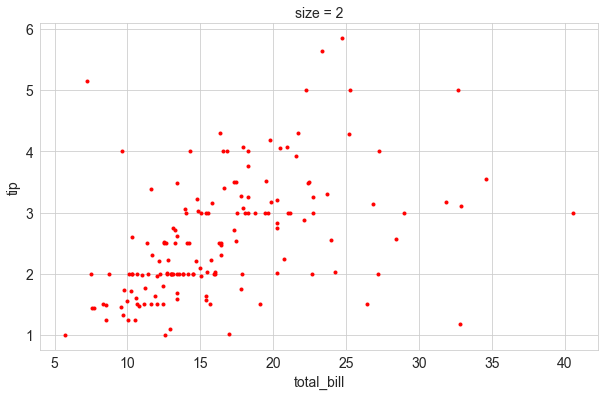

In [33]:
# PLot tip vs total bill for this party size
plt.plot(df.loc[df['size'] == 2]['total_bill'], df.loc[df['size'] == 2]['tip'], '.r')
plt.title('size = 2', fontsize='14')
plt.xlabel('total_bill', fontsize='14')
plt.ylabel('tip', fontsize='14')

### 3.4.2 How about regression for party sizes of 2, 3, 4 combined?

In [34]:
s3 = df.loc[df['size'].isin([2, 3, 4])] # all columns, certain rows
X = s3[['total_bill']] 
# print(X)
y = df.loc[df['size'].isin([2, 3, 4])]['tip'] # all in one ok
model.fit(X, y) # do fit

print('Line slope size=2,3,4: \n', model.coef_)
print('y intercept size=2,3,4: \n', model.intercept_)
print('R-squared size=2,3,4: \n', model.score(X,y))

Line slope size=2,3,4: 
 [0.10472345]
y intercept size=2,3,4: 
 0.9202481221900891
R-squared size=2,3,4: 
 0.4377621135583911


It's not a surprise to see that the fit on including party sizes of 2, 3, and 4 is almost identical to that for the full data set. These party sizes combined cover all but 13 rows of the data frame. We don't gain any extra information by doing this.

### 3.4.3 Regression with various combinations of categorical variables.

In [35]:
# Select sex and smoker combinations to compare linear regression results.
fs = df.loc[(df['sex'] == 'Male') & (df['smoker'] == 'No')]
print(fs.shape) # check numbers correspond to pivot table data below.
X = fs[['total_bill']]
y = fs['tip']

model.fit(X, y) # do fit

print('Line slope : \n', model.coef_)
print('y intercept : \n', model.intercept_)
print('R-squared : \n', model.score(X,y))

# What tip do we predict for total_bill=$100?
spend = 100
pred = model.coef_ * spend + model.intercept_
print("We expect a tip of $", round(pred[0],2), " for a spend of $", spend )

(97, 8)
Line slope : 
 [0.13971878]
y intercept : 
 0.3481945382935785
R-squared : 
 0.6700097355989045
We expect a tip of $ 14.32  for a spend of $ 100


In [36]:
# Select certain days.
print("Days are: ", df.day.unique())

d = df.loc[df['day'] == 'Sun'] # all columns, certain rows
X = d[['total_bill']] 
# print(X)
y = df.loc[df['day'] == 'Sun']['tip'] # all in one ok
model.fit(X, y) # do fit

print('Line slope day: \n', model.coef_)
print('y intercept day: \n', model.intercept_)
print('R-squared day: \n', model.score(X,y))

# What tip do we predict for total_bill=$100?
spend = 100
pred = model.coef_ * spend + model.intercept_
print("We expect a tip of $", round(pred[0],2), " for a spend of $", spend )

Days are:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
Line slope day: 
 [0.07015353]
y intercept day: 
 1.7531444940283958
R-squared day: 
 0.25175578021289746
We expect a tip of $ 8.77  for a spend of $ 100


I realize that this part of the notebook has become long, but I don't want to just delete it because this is an assignment.  Rather than including lots of results here, I'll summarize the findings of this section (regression using only certain subsets of the data) in the README. Looks like the highest $R^2$ occurs for M or F non-smokers. The slope of the regression line for non-smokers, regardless of sex, is larger than for smokers. So what? I could keep going looking at various combinations of day and time, but I think I'll leave it for now. I will just note that good fitting parameters are also obtained for day = Thursday.

***
## 4. Relationships between variables

In the section on regression above, we investigated if the tip amount is related to the total bill. We found that it was. We also started looking as subsets of the data set chosen by categorical variable, in particular how choosing different combinations of diner affected the linear regression. What other questions can we ask of the data at this stage?


### 4.1 Visualize relationships between numerical variables with pairplot

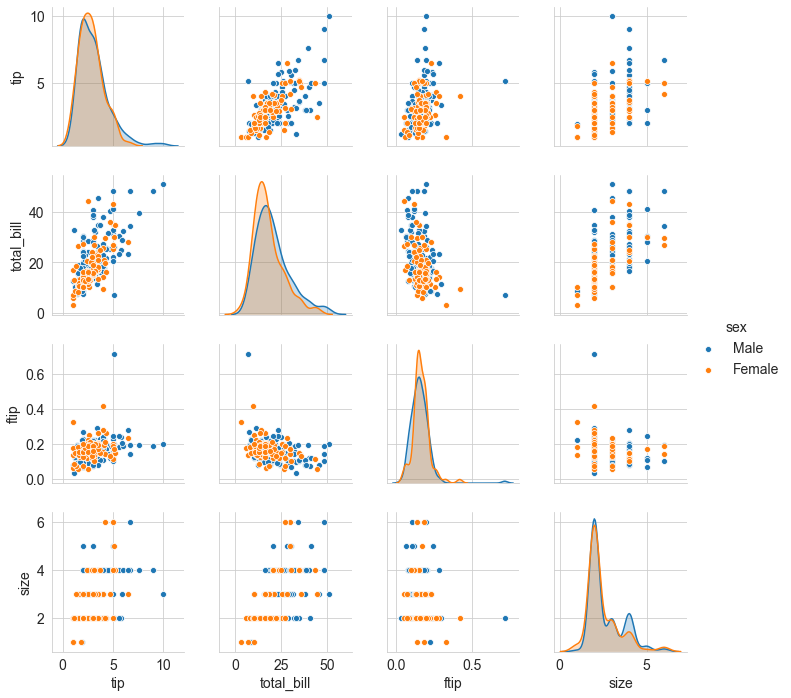

In [37]:
# I'll start with a pairplot to see if anything jumps out from the numeric variables.
sns.pairplot(df, vars=["tip", "total_bill", "ftip", "size"], hue='sex')

Immediately we can see (top row second column) that there appears to be a relationship between the total bill and tip amount. Indeed, that was the relationship we investigated in the section on regression. Apart from that observation, I don't know if this Seaborn pairplot is much more use to us as most variables in the data set are categorical. I ran the code cell cycling through different *hue* keywords; there is *possibly* a bit of separation between the sex and smoker groups in some of the plots. Maybe we could use this information for classification later on? 

### 4.2 Investigate relationships between tip amount and the categorical variables
If we are just interested in cold hard cash we can look at the tip amount rather than tip percentage. Wes McKinney's video "10 minutes to Pandas" talks about the pivot_table as a method to aggregate the numerical data by categorical variable. The default function is mean. We can use this to differentiate between the sexes, and further between smokers and non-smokers for example. I will use the pivot_table to investigate the relationship between the tip amount and the various categorical variables. I will assume $ when listing tip amounts.

### 4.2.1 Look at sex, smoker, and size first

In [38]:
# Summarize data using sex and smoker keys AND group by size.
# Replace any empty cells with 0.
df.pivot_table(['tip'], index=['sex', 'smoker'], columns = 'size', fill_value=0)

## Recall outlier = male, smoker, Sunday, dinner, size=2.
## See a tiny change in that cell, not worth going to the trouble of ignoring it.
# df[df.ftip < 0.6].pivot_table(['ftip'], index=['sex', 'smoker'], columns='size') # columns='day' or'time' # ignore outlier

tip                                          
size               1         2         3         4     5     6
sex    smoker                                                 
Male   Yes     1.920  2.692927  4.272857  3.981111  2.50  0.00
       No      0.000  2.557544  3.148824  4.262632  5.00  5.85
Female Yes     1.000  2.736800  3.846000  4.045000  0.00  0.00
       No      1.415  2.370606  2.918889  4.014286  5.14  4.60

In [39]:
# Find the maximum
print("Max values:", df.pivot_table(['tip'], index=['sex', 'smoker'], columns = 'size').max())
# Find the minumum (don't fill with zeros now)
print("Min values:", df.pivot_table(['tip'], index=['sex', 'smoker'], columns = 'size').min())

Max values:      size
tip  1       1.920000
     2       2.736800
     3       4.272857
     4       4.262632
     5       5.140000
     6       5.850000
dtype: float64
Min values:      size
tip  1       1.000000
     2       2.370606
     3       2.918889
     4       3.981111
     5       2.500000
     6       4.600000
dtype: float64


In [40]:
# How many in each group?.
df.pivot_table(['tip'], index=['sex', 'smoker'], columns='size', aggfunc='count', fill_value=0) # To count group sizes.

tip                  
size            1   2   3   4  5  6
sex    smoker                      
Male   Yes      1  41   7   9  2  0
       No       0  57  17  19  2  2
Female Yes      1  25   5   2  0  0
       No       2  33   9   7  1  2

- The highest average tip is for male non-smokers in a party of 6 (\$5.85, count = 2). 
- The lowest average tip is for female smokers dining alone (\$1.00, count = 1).

### 4.2.2 Look at sex, smoker and day

In [41]:
# Summarize fractional tip column using sex AND smoker keys and group by day.
df.pivot_table(['tip'], index=['sex', 'smoker'], columns='day', fill_value=0) # To count group sizes: aggfunc='count'

tip                              
day              Thur       Fri       Sat       Sun
sex    smoker                                      
Male   Yes     3.0580  2.741250  2.879259  3.521333
       No      2.9415  2.500000  3.256563  3.115349
Female Yes     2.9900  2.682857  2.868667  3.500000
       No      2.4596  3.125000  2.724615  3.329286

In [42]:
# Find the maximum
print("Max values:", df.pivot_table(['tip'], index=['sex', 'smoker'], columns = 'day').max())
# Find the minumum (don't fill with zeros now)
print("Min values:", df.pivot_table(['tip'], index=['sex', 'smoker'], columns = 'day').min())

Max values:      day 
tip  Thur    3.058000
     Fri     3.125000
     Sat     3.256563
     Sun     3.521333
dtype: float64
Min values:      day 
tip  Thur    2.459600
     Fri     2.500000
     Sat     2.724615
     Sun     3.115349
dtype: float64


In [43]:
# How many in each of these groups?.
df.pivot_table(['tip'], index=['sex', 'smoker'], columns='day', aggfunc='count', fill_value=0) # To count group sizes

tip            
day           Thur Fri Sat Sun
sex    smoker                 
Male   Yes      10   8  27  15
       No       20   2  32  43
Female Yes       7   7  15   4
       No       25   2  13  14

- The largest average tip occurs for male smokers on Sundays (\$3.52, count = 15).
- The lowest average tip occurs for female non-smokers on Thursdays (\$2.46, count = 25).

In [44]:
## Summarize tip column using sex AND smoker keys and group by time.
#df.pivot_table(['tip'], index=['sex', 'smoker'], columns='time', fill_value=0) # To count group sizes: aggfunc='count'
#print(df.pivot_table(['tip'], index=['sex', 'smoker'], columns='time', fill_value=0).max())
#print(df.pivot_table(['tip'], index=['sex', 'smoker'], columns='time').min())
## How many in each of these groups?.
#df.pivot_table(['tip'], index=['sex', 'smoker'], columns='time', aggfunc='count', fill_value=0) # To count group sizes

I could also analyze by sex AND smoker key and group by time. 
- The largest average tip occurs for male non-smokers at dinner (\$3.15, count = 77). 
- The lowest average tip occurs for female non-smokers at lunch (\$2.45, count = 25).

### 4.2.3 Bring it all together: look at sex, smoker, day, time *and* size.
This will consolidate all of the information for the last few code cells. In hindsight, I could have done this at the start but I needed to make sense of it. I didn't realize I could do so much grouping in a single command.

In [45]:
# Summarize tip column using sex AND smoker AND day keys and group by time.
# Leave out the fill value here, think it confuses things.
df.pivot_table(['tip'], index=['sex', 'smoker', 'day', 'time'], columns='size', fill_value=0)

tip                                         
size                          1         2         3         4     5    6
sex    smoker day  time                                                 
Male   Yes    Thur Lunch   0.00  2.822500  4.000000  4.000000  0.00  0.0
              Fri  Lunch   1.92  1.890000  0.000000  0.000000  0.00  0.0
                   Dinner  0.00  2.875000  0.000000  4.730000  0.00  0.0
              Sat  Dinner  0.00  2.318235  4.602500  3.384000  3.00  0.0
              Sun  Dinner  0.00  3.314000  3.750000  5.090000  2.00  0.0
       No     Thur Lunch   0.00  2.559375  2.180000  4.000000  5.00  6.7
              Fri  Dinner  0.00  2.500000  0.000000  0.000000  0.00  0.0
              Sat  Dinner  0.00  2.520588  3.356667  5.191667  0.00  0.0
              Sun  Dinner  0.00  2.590000  3.020000  3.820000  5.00  5.0
Female Yes    Thur Lunch   0.00  2.540000  3.230000  5.000000  0.00  0.0
              Fri  Lunch   0.00  2.660000  0.000000  0.000000  0.00  0.0
                   Dinner  0.00  2.700000  0.000000  0.000000  0.00  0.0
              Sat  Dinner  1.00  2.721818  4.500000  3.090000  0.00  0.0
              Sun  Dinner  0.00  3.500000  3.500000  0.000000  0.00  0.0
       No     Thur Lunch   1.83  2.111667  1.360000  4.045000  0.00  4.6
                   Dinner  0.00  3.000000  0.000000  0.000000  0.00  0.0
              Fri  Lunch   0.00  0.000000  3.000000  0.000000  0.00  0.0
                   Dinner  0.00  3.250000  0.000000  0.000000  0.00  0.0
              Sat  Dinner  1.00  2.653750  3.580000  2.450000  0.00  0.0
              Sun  Dinner  0.00  2.548000  2.792500  4.390000  5.14  0.0

In [46]:
# Find the maximum
print("Max values:", df.pivot_table(['tip'], index=['sex', 'smoker', 'day', 'time'], columns='size', fill_value=0).max())
# Find the minumum (don't fill with zeros now)
print("Min values:", df.pivot_table(['tip'], index=['sex', 'smoker', 'day', 'time'], columns='size').min())

Max values:      size
tip  1       1.920000
     2       3.500000
     3       4.602500
     4       5.191667
     5       5.140000
     6       6.700000
dtype: float64
Min values:      size
tip  1       1.00
     2       1.89
     3       1.36
     4       2.45
     5       2.00
     6       4.60
dtype: float64


In [47]:
# How many in each of these groups?.
df.pivot_table(['tip'], index=['sex', 'smoker', 'day', 'time'], columns='size', aggfunc='count', fill_value=0) # Count group sizes

tip                 
size                        1   2  3   4  5  6
sex    smoker day  time                       
Male   Yes    Thur Lunch    0   8  1   1  0  0
              Fri  Lunch    1   2  0   0  0  0
                   Dinner   0   4  0   1  0  0
              Sat  Dinner   0  17  4   5  1  0
              Sun  Dinner   0  10  2   2  1  0
       No     Thur Lunch    0  16  1   1  1  1
              Fri  Dinner   0   2  0   0  0  0
              Sat  Dinner   0  17  9   6  0  0
              Sun  Dinner   0  22  7  12  1  1
Female Yes    Thur Lunch    0   5  1   1  0  0
              Fri  Lunch    0   3  0   0  0  0
                   Dinner   0   4  0   0  0  0
              Sat  Dinner   1  11  2   1  0  0
              Sun  Dinner   0   2  2   0  0  0
       No     Thur Lunch    1  18  1   2  0  2
                   Dinner   0   1  0   0  0  0
              Fri  Lunch    0   0  1   0  0  0
                   Dinner   0   1  0   0  0  0
              Sat  Dinner   1   8  3   1  0  0
              Sun  Dinner   0   5  4   4  1  0

To summarize, we could have run this pivot_table command at the start of the notebook and it would have broken down the dataset into every combination of categorical variable! But it is not easy to read these complicated pivot tables. 
- The highest average tip is for male non-smokers at lunch on Thursday in a party of six (\$6.70, count = 1).
- The lowest average tip occurs for female smokers and non-smokers dining alone at dinner on Saturdays (\$1.00, count = 1 each). 

In [48]:
# Find max count per group
df.pivot_table(['tip'], index=['sex', 'smoker', 'day', 'time'], columns='size', aggfunc='count', fill_value=0).max()

     size
tip  1        1
     2       22
     3        9
     4       12
     5        1
     6        2
dtype: int64

Finally, we note that the largest number of observations apply to male, non-smokers, dining with one other person at dinner on Sundays. There are 22 of them.

### 4.3 Does the amount spent depend on party size?
We will now look for a relationship between total_bill and size. I would expect there to be one, but what form does it take? We may also analyze the total bill and tip per person.

Text(0, 0.5, 'Total bill')

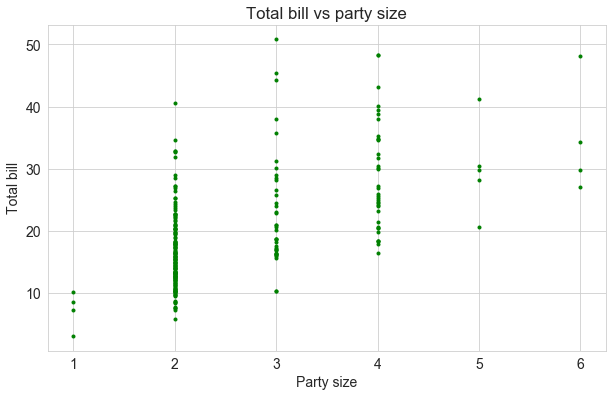

In [61]:
# plot total_bill vs size
plt.plot(df['size'], df['total_bill'], 'g.')
plt.title("Total bill vs party size")
plt.xlabel("Party size")
plt.ylabel("Total bill")

In [50]:
# Calculate the correlation matrix to see how these variables are related.
# Square off-diagonal element to get Rsquared. [row=0][col=1]
print("R squared:", round(np.corrcoef(df['total_bill'], df['size'])[0][1] ** 2, 3))

R squared: 0.358


We now calculate the total bill per person and add it to the dataframe as a column.

In [62]:
# Calculate the bill per person (bpp) and add it to the data frame.
df['bpp'] = df['total_bill'] / df['size']
df.head(3)

,ftip,total_bill,tip,sex,smoker,day,time,size,bpp,tpp
0,0.059447,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0.505000
1,0.160542,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,0.553333
2,0.166587,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1.166667


Calculate the tip per person and add it to the dataframe also.

In [63]:
# Calculate the tip per person (tpp) and add it to the data frame.
df['tpp'] = df['tip'] / df['size']
df.head(3)

,ftip,total_bill,tip,sex,smoker,day,time,size,bpp,tpp
0,0.059447,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0.505000
1,0.160542,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,0.553333
2,0.166587,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1.166667


**Use pandas groupby to find the average of each variable for each party size.**

In [64]:
# I'd like average values of everything for each size; create a new dataframe with results.
# Got stuck here for a bit until I reset_index() so that size could be a column name in the result. 
df1 = df.groupby(['size']).mean().reset_index()
df1 #check

,size,ftip,total_bill,tip,bpp,tpp
0,1,0.217292,7.242500,1.437500,7.242500,1.437500
1,2,0.165719,16.448013,2.582308,8.224006,1.291154
2,3,0.152157,23.277632,3.393158,7.759211,1.131053
3,4,0.145949,28.613514,4.135405,7.153378,1.033851
4,5,0.141495,30.068000,4.028000,6.013600,0.805600
5,6,0.156229,34.830000,5.225000,5.805000,0.870833


**How does the average total bill per person vary with party size?**

In [65]:
# Do simple linear regression using polyfit
fit = np.polyfit(df1['size'], df1['bpp'], 1)
m, c = fit[0], fit[1]
print("Polyfit: m = %8.6f, c = %6.6f." % (m, c))

Polyfit: m = -0.412130, c = 8.475404.


In [66]:
# correlation coefficient
print("R squared:", round(np.corrcoef(df1['size'], df1['bpp'])[0][1] ** 2, 3))

R squared: 0.653


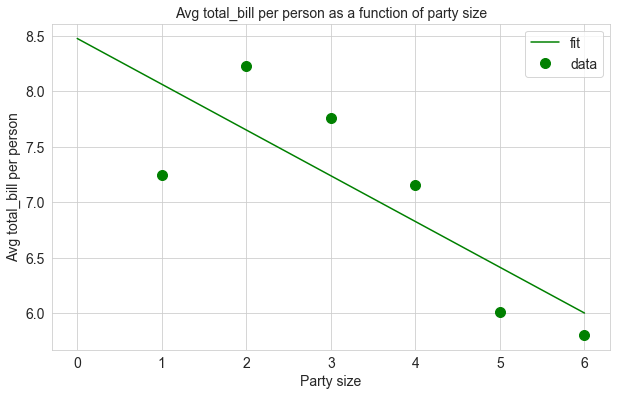

In [67]:
# Plot fitted line with the data.
x = np.arange(0.0, 7.0, 1.0)
#print(m)
#print(c)
plt.plot(x, m * x + c, 'g-', label="fit")
plt.plot(df1['size'], df1['bpp'], '.g', markersize=20, label="data")

plt.title('Avg total_bill per person as a function of party size', fontsize='14')
plt.xlabel('Party size', fontsize='14')
plt.ylabel('Avg total_bill per person', fontsize='14')
plt.legend()

## Save the plot if required.
#plt.savefig("images/LSQbpp.png")

What can we say about this plot? There is a downward trend to the average total bill per person as the party size increases. The data is fit well with a straight line ($R^2 = 0.653$), bearing in mind that there are only a handful of observations for party sizes of 1, 5, and 6. So, as party size increases, it doesn't mean that the average amount spent per person will too. 

**How does the average tip per person vary with party size?**

In [68]:
# Do simple linear regression using polyfit
fit2 = np.polyfit(df1['size'], df1['tpp'], 1)
m2, c2 = fit2[0], fit2[1]
print("Polyfit: m = %8.6f, c = %6.6f." % (m2, c2))

Polyfit: m = -0.125348, c = 1.533718.


In [69]:
# correlation coefficient
print("R squared:", round(np.corrcoef(df1['size'], df1['tpp'])[0][1] ** 2, 3))

R squared: 0.933


Oooh, a very good fit.

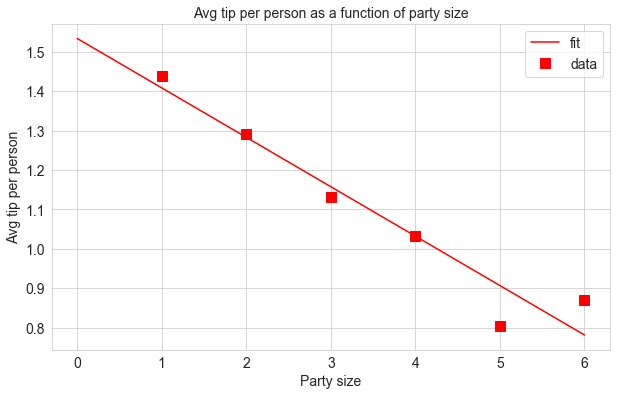

In [70]:
# Plot fitted line with the data for average tip per person vs size.
x = np.arange(0.0, 7.0, 1.0)
plt.plot(x, m2 * x + c2, 'r-', label="fit")

plt.plot(df1['size'], df1['tpp'], 'sr', markersize=10, label="data")

plt.title('Avg tip per person as a function of party size', fontsize='14')
plt.xlabel('Party size', fontsize='14')
plt.ylabel('Avg tip per person', fontsize='14')
plt.legend()

## Save the plot if required.
#plt.savefig("images/LSQtpp.png")

What can we conclude from this plot? There is a clear decrease in average tip per person as party size increases. The data is very fit well with a straight line ($R^2 = 0.933$), bearing in mind that there are only a handful of observations for party sizes of 1, 5, and 6. 

**Take a quick look at the distribution of tips per diner**

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'tpp')]

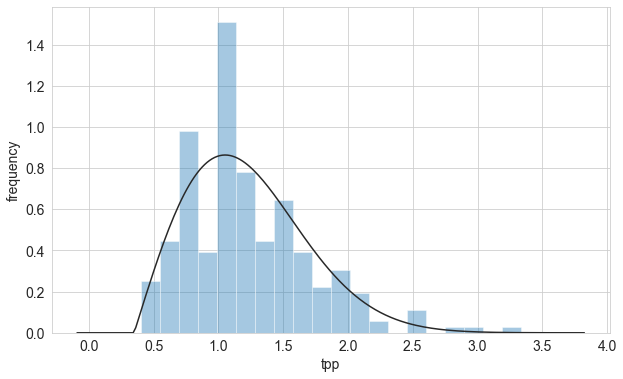

In [71]:
#plt.hist(df['tpp'], 50, density=True, facecolor='b', alpha=0.75)
ax = sns.distplot(df['tpp'], bins=20, kde=False, fit=stats.rayleigh)
ax.set(xlabel= 'tpp', ylabel= 'frequency')

Looks like the distribution of tips per person is not symmetrical, but is slightly skewed towards higher values. I played around with distributions from the SciPy statistics package until I found one that looks ok on top of the histogram. It doesn't mean that's actually the correct distribution to use to model tip per person.

### 4.4 Next section

Notes: 
- Why do this? Regression results above had largest $R^2$ and slope for non-smokers, regardless of sex. Same for day=Thur. Does this suggest a good subset of the data to use for reliable prediction?
- Lin reg using all cat vars? Other work?
- Do smokers tip more than non-smokers? done
- Do men tip less than women?  done
- Are diners more likely to leave a large tip if they eat in the evening as part of a large group, rather than at lunch with a single friend? 
- Does the day of the week matter at all?
- Maybe explore relationship, if any, between tip and gender, party size etc. 
- What factors contribute to higher tips?
- spend/person as function of size. done